# Sales & Revenue Analysis with Python

This notebook analyzes a synthetic sales dataset using Python and pandas.
The goal is to demonstrate data loading, cleaning, transformation, and business-oriented analysis.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
customers = pd.read_csv("customers.csv")
products = pd.read_csv("products.csv")
orders = pd.read_csv("orders.csv")
order_items = pd.read_csv("order_items.csv")

In [18]:
orders["order_date"] = pd.to_datetime(orders["order_date"])

In [19]:
orders.isnull().sum(), order_items.isnull().sum()

(order_id       0
 customer_id    0
 order_date     0
 dtype: int64,
 order_item_id    0
 order_id         0
 product_id       0
 quantity         0
 unit_price       0
 dtype: int64)

No missing values were found in the orders and order_items datasets, ensuring data completeness for revenue calculations.

In [20]:
sales_df = (
    order_items
    .merge(orders, on="order_id", how="left")
    .merge(products, on="product_id", how="left")
    .merge(customers, on="customer_id", how="left")
)

Left joins were used to preserve all order items, even if related dimension data is missing.


In [21]:
sales_df["revenue"] = sales_df["quantity"] * sales_df["unit_price"]

In [22]:
sales_df.head()

,order_item_id,order_id,product_id,quantity,unit_price,customer_id,order_date,product_name,category,price,customer_name,region,revenue
0,1,1,1,1,1150,1,2024-01-15,Laptop,Electronics,1200,Ana García,Spain,1150
1,2,1,3,2,140,1,2024-01-15,Headphones,Accessories,150,Ana García,Spain,280
2,3,2,2,1,780,2,2024-01-20,Smartphone,Electronics,800,Carlos López,Mexico,780
3,4,3,4,1,290,3,2024-02-05,Office Chair,Furniture,300,Lucía Fernández,Argentina,290
4,5,4,5,2,75,1,2024-02-18,Desk Lamp,Furniture,80,Ana García,Spain,150


In [23]:
sales_df["revenue"].sum()

np.int64(4000)

This represents the total revenue generated in the dataset.

## Data Preparation Summary

The individual datasets were merged into a single dataframe to simplify analysis.
A revenue column was created using quantity and unit price to reflect actual sales value.
This prepared dataset serves as the foundation for all subsequent analysis.

## Revenue by Product Category

To understand which product categories generate the most revenue, we aggregate sales by category using the revenue calculated at the order item level.

In [24]:
revenue_by_category = (
    sales_df
    .groupby("category", as_index=False)["revenue"]
    .sum()
    .sort_values(by="revenue", ascending=False)
)

revenue_by_category

,category,revenue
1,Electronics,3130
2,Furniture,440
0,Accessories,430


Electronics generate the highest revenue in the dataset, followed by Furniture and Accessories. This indicates that higher-priced items contribute disproportionately to total revenue.

## Monthly Revenue Trend

This section analyzes how revenue evolves over time by aggregating sales on a monthly basis. The goal is to identify patterns or changes in sales performance across months.

In [25]:
monthly_revenue = (
    sales_df
    .groupby(
        sales_df["order_date"].dt.to_period("M")
    )["revenue"]
    .sum()
    .reset_index()
)

monthly_revenue["order_date"] = monthly_revenue["order_date"].astype(str)
monthly_revenue

,order_date,revenue
0,2024-01,2210
1,2024-02,440
2,2024-03,1350


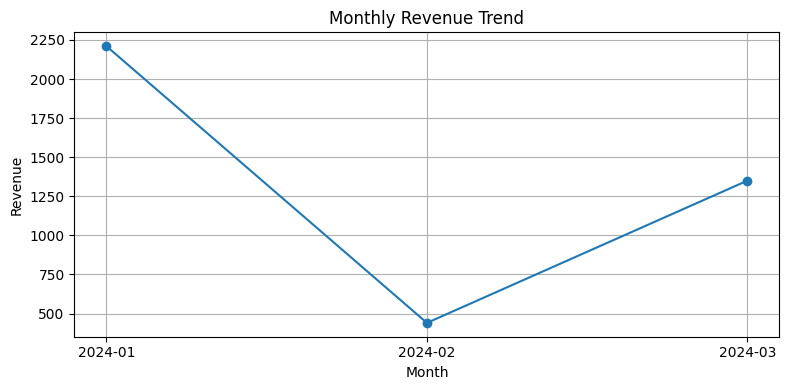

In [26]:
plt.figure(figsize=(8, 4))
plt.plot(monthly_revenue["order_date"], monthly_revenue["revenue"], marker="o")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()

The chart shows a drop in revenue in February followed by a recovery in March. This pattern could indicate seasonal effects, delayed purchases, or variability in order volume across months.
With a larger time window, this analysis could be used to identify long-term trends and seasonality.

In [27]:
# Export dataset for dashboard consumption
sales_df.to_csv("../sales_dashboard.csv", index=False)

## Conclusions

This analysis demonstrated a complete workflow, from raw data loading and validation to revenue analysis and visualization.

Key takeaways:
- Revenue is primarily driven by higher-priced product categories.
- Monthly revenue shows variability, highlighting the importance of analyzing trends over longer periods.
- Clean data preparation is essential for accurate business insights.

This notebook showcases a practical approach to data analysis using Python and pandas, focused on clarity, correctness, and business relevance.